In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob1
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset,  zoomed_inset_axes)
import seaborn as sns

C:\Users\zxk94\AppData\Local\Temp\ipykernel_5440\1481597317.py:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [12]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family']='arial'
params = {'legend.edgecolor': '0',
          'lines.markersize' : 7,
          'legend.borderaxespad': 1.5,
          'legend.fancybox': False,
          'legend.fontsize': 22.0,
          'legend.framealpha': 0.5,
          'legend.labelspacing': 0.3,
          'legend.markerscale': 1.0,
          'figure.figsize': (10, 8),
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'axes.linewidth': 3,
         'axes.xmargin': 0.03,
         'axes.ymargin': 0.03,
         'xtick.direction': 'in',
         'xtick.labelsize': 30,
         'xtick.major.pad': 10,
         'xtick.major.size': 10,
         'xtick.major.width': 3,
         'xtick.minor.pad': 10,
         'xtick.minor.size': 5,
         'xtick.minor.visible': True,
         'xtick.minor.width': 2,
         'xtick.top': True,
         'ytick.direction': 'in',
         'ytick.labelsize': 30,
         'ytick.major.pad': 10,
         'ytick.major.size': 10,
         'ytick.major.width': 3,
         'ytick.minor.pad': 10,
         'ytick.minor.size': 5,
         'ytick.minor.visible': True,
         'ytick.minor.width': 2,
         'ytick.right': True,}
plt.rcParams.update(params)

colors = sns.color_palette("Set2") # best color profile I see so far.

# Ramsey measurements

In [38]:
def gaussian_decay(x,fwhm,amp):
    return amp*np.exp(-(np.pi*fwhm*x)**2/(4*np.log(2)))

def decay_fit(x,y,isplot=True,ax=None,label=None,color=None,plotfit=True):
    from lmfit import Model
    mod = Model(gaussian_decay)
    params = mod.make_params(fwhm=180.,amp=1)
    params['amp'].set(min=0,vary=False)
    params['fwhm'].set(min=0)
    result = mod.fit(y,params,x=x,nan_policy='omit')
    if isplot:
        if ax is None:
            f = plt.figure()
            ax=  f.add_subplot(111)
        dummyx = np.linspace(min(x),max(x),1000)
        if color is None:
            ax.plot(x*1e3,y,'o-',label=label)
            if plotfit:
                ax.plot(dummyx*1e3,mod.eval(result.params,x=dummyx))
        else:
            ax.plot(x*1e3,y,'o-',label=label,color=color)
            if plotfit:
                ax.plot(dummyx*1e3,mod.eval(result.params,x=dummyx),color=color,alpha=0.5)
        print ('%s: FWHM is %.1f +- %.1f Hz'%(label,result.params['fwhm'].value,result.params['fwhm'].stderr))
    return result,mod




In [53]:
delay_ms = np.array([1,2,5,7.5,10,12])
contrast_lt_active = [0.95,0.913,0.62,0.43,0.285,0.22] 
contrast_no_lt_active = [0.942,0.9,0.625,0.433,0.253,0.178]
contrast_lt_notactive = [0.929,0.748,0.273,0.0,0.0,0.0]
contrast_lt_active_w_box = [0.913,0.826,0.648,0.41,0.217,float('nan')] 
new_contrast_endJune_x = np.array([0.1,1,2,3,5])
new_contrast_endJune_y = [0.96,0.75,0.65,0.23,0]

# 26th of July 2022
delay_ms_threehalf = np.array([0.01,1,3,6,20])
contrast_threehalf = np.array([[0.988,0.016],[0.931,0.015],[0.915,0.02],[0.763,0.018],[0.596,0.017]])

delay_ms_fivehalf = np.array([0.01,3,4,5,6,10])
contrast_fivehalf = np.array([[1,0.016],[0.599,0.018],[0.522,0.028],[0.313,0.017],[0.14,0.015],[0.046,0.016]])

line_trigger = (10,0.674,0.021) # delay_ms, vis, dvis

delay_ms_threehalf_1207 = np.array([0.01,5,10,15,20,30])
contrast_threehalf_1207 = np.array([[1.016,0.017],[0.756,0.015],[0.579,0.017],[0.528,0.018],[0.572,0.02],
                                   [0.317,0.015]])

Text(0.5, 1.0, 'Ramsey Measurements')

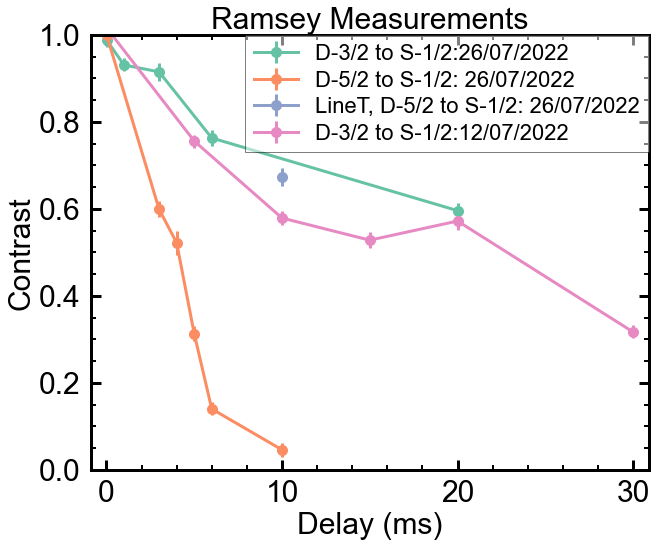

In [64]:

colors = sns.color_palette("Set2") # best color profile I see so far.
f = plt.figure()
ax = f.add_subplot(111)


# res,mod = decay_fit(new_contrast_endJune_x*1e-3,new_contrast_endJune_y,isplot=True, ax=ax,color=colors[0],
#                     label='No LineTrigger, Act.Stab.Isolation Off',plotfit= False)
ax.errorbar(delay_ms_threehalf,contrast_threehalf[:,0],yerr=contrast_threehalf[:,1],fmt='o-',color=colors[0],
           label='D-3/2 to S-1/2:26/07/2022')
ax.errorbar(delay_ms_fivehalf,contrast_fivehalf[:,0],yerr=contrast_fivehalf[:,1],fmt='o-',color=colors[1],
           label='D-5/2 to S-1/2: 26/07/2022')
ax.errorbar(line_trigger[0],line_trigger[1],yerr=line_trigger[2],fmt='o-',color=colors[2],
           label='LineT, D-5/2 to S-1/2: 26/07/2022')

ax.errorbar(delay_ms_threehalf_1207,contrast_threehalf_1207[:,0],yerr=contrast_threehalf_1207[:,1],
            fmt='o-',color=colors[3],
           label='D-3/2 to S-1/2:12/07/2022')
# res,mod = decay_fit(delay_ms_threehalf*1e-3,contrast_threehalf[:,0],isplot=True, ax=ax,color=colors[3],
#                     label='No LineTrigger, Act.Stab.Isolation Off',plotfit= not False)
ax.scatter
ax.set_ylim(0,1)
ax.set_xlabel('Delay (ms)')
ax.legend(loc='upper right',borderaxespad=0)
ax.set_ylabel('Contrast')
ax.set_title('Ramsey Measurements')
# f.savefig(r'Z:\qfc\measurements\general\2022\2022_Ramsey\20220726_Ramsey_measurements_QFC.png',dpi=100,bbox_inches='tight',facecolor='white')

LineTrigger, Act.Stab.Isolation: FWHM is 62.3 +- 3.1 Hz
No LineTrigger, Act.Stab.Isolation: FWHM is 64.2 +- 2.6 Hz
LineTrigger, No Act.Stab.Isolation: FWHM is 128.0 +- 5.0 Hz
LineTrigger, Act.Stab.Isolation, BoxClosed: FWHM is 67.9 +- 4.1 Hz


Text(0.5, 1.0, 'Ramsey Measurements')

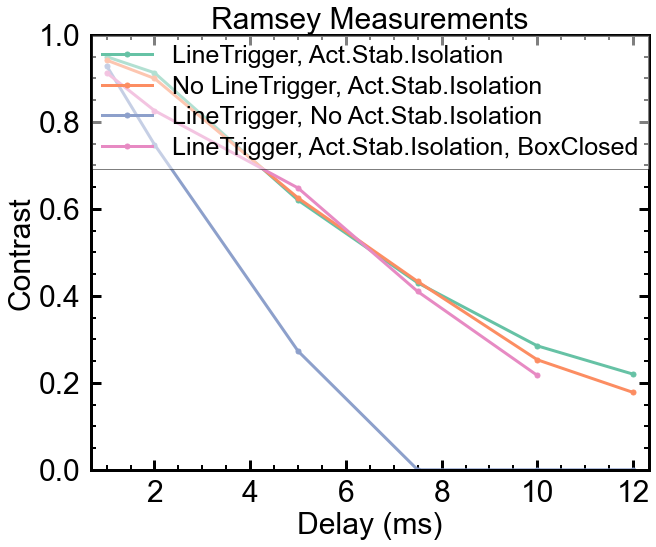

In [6]:
# colors = sns.color_palette()
colors = sns.color_palette("Set2") # best color profile I see so far.
f = plt.figure()
ax = f.add_subplot(111)

res, mod = decay_fit(delay_ms*1e-3,contrast_lt_active,isplot=True, ax=ax, color=colors[0],label='LineTrigger, Act.Stab.Isolation',plotfit=False)
res, mod = decay_fit(delay_ms*1e-3,contrast_no_lt_active,isplot=True, ax=ax,color=colors[1], label='No LineTrigger, Act.Stab.Isolation',plotfit=False)
res, mod = decay_fit(delay_ms*1e-3,contrast_lt_notactive,isplot=True, ax=ax,color=colors[2], label='LineTrigger, No Act.Stab.Isolation',plotfit=False)

res,mod = decay_fit(delay_ms*1e-3,contrast_lt_active_w_box,isplot=True, ax=ax,color=colors[3], label='LineTrigger, Act.Stab.Isolation, BoxClosed',plotfit=False)

ax.set_ylim(0,1)
ax.set_xlabel('Delay (ms)')
ax.legend(loc='upper right',borderaxespad=0)
ax.set_ylabel('Contrast')
ax.set_title('Ramsey Measurements')
# f.savefig(r'Z:\qfc\measurements\general\2022\2022_06_03_Ramsey\20220603_Ramsey_measurements_SPICY.png',dpi=100,bbox_inches='tight',facecolor='white')

# Temperature stability

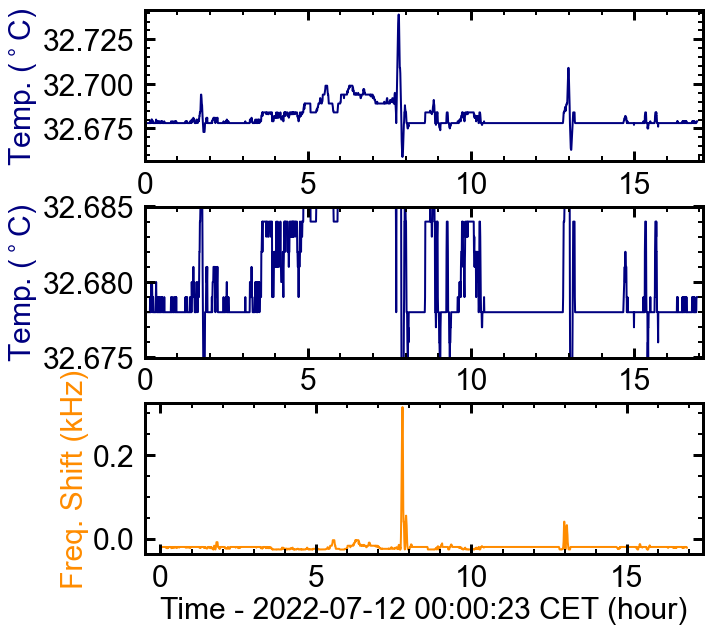

In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
directory  = r'Z:\qfc\measurements\general\2022\cavity_temperature_log'
temp_data = os.path.join(directory,'July2022_Temp_Log.dat')


temperature_data = pd.read_csv(temp_data,delimiter='\t',skiprows=1,header=None)
temperature_celcius = np.array(temperature_data[temperature_data.keys()[2]])
time_day = np.array(temperature_data[temperature_data.keys()[1]])
dates = np.array(temperature_data[temperature_data.keys()[0]])
time_s = np.zeros(len(dates))
next_day = [0]
for j in range(len(dates)):
    try:
        if dates[j-1] != dates[j]:
            next_day.append(j)
    except:
        pass
    _temp = '%s %s'%(dates[j],time_day[j])
    epoch = datetime(1970, 1, 1)
    formats = "%d/%m/%Y %H:%M:%S"
    time_s[j] = (datetime.strptime(_temp, formats) - epoch).total_seconds()

index = -1
end_time = int(3600*24) # 24 hours
time_zero_ori = time_s[next_day[index]] - 2*3600
time_zero = datetime.fromtimestamp(time_zero_ori).strftime( "%Y-%m-%d %H:%M:%S" )
time_s -= time_s[next_day[index]]
start = np.searchsorted(time_s,0)
end =np.searchsorted(time_s,end_time)
time_s = time_s[start:end]
temperature_celcius =temperature_celcius[start:end]
###
#calibrate frequency shift

beat_freq_shift_vs_temp = os.path.join(directory,'Beat_freq_MHz_vs_Temperature_degCel.csv')
freq_shift = pd.read_csv(beat_freq_shift_vs_temp,header=None)
temp = freq_shift[0][:-1]
freq_shift_Mhz = freq_shift[1][:-1]
from scipy.interpolate import interp1d
freq_shift_func = interp1d(temp,freq_shift_Mhz,kind='cubic')
from lmfit.models import PolynomialModel
mod = PolynomialModel(degree=2)
params = mod.guess(freq_shift_Mhz,x=temp)
result = mod.fit(freq_shift_Mhz,params,x=temp)

###
f = plt.figure(figsize=(10,10))
f.subplots_adjust(hspace=0.3)
ax = f.add_subplot(311)
ax0 = f.add_subplot(312)
ax1 = f.add_subplot(313)
# ax1 =  ax.twinx()
ax1.plot(time_s/3600, 1e3*mod.eval(result.params,x=temperature_celcius)-1e3*mod.eval(result.params,x=32.7),'-',
         color='darkorange',zorder=0,alpha=1,markersize=5,lw=2)
ax1.set_ylabel('Freq. Shift (kHz)',color='darkorange')
ax.plot(time_s/3600,temperature_celcius,'-',color='navy',zorder=1,markersize=5,lw=2)
ax0.plot(time_s/3600,temperature_celcius,'-',color='navy',zorder=1,markersize=5,lw=2)
# ax.set_xlabel('Time - %s GMT (hour)'%(time_zero))
ax1.set_xlabel('Time - %s CET (hour)'%(time_zero))
ax.set_ylabel('Temp. ($^\circ$C)',color='navy')
ax0.set_ylabel('Temp. ($^\circ$C)',color='navy')
ax.set_xlim(left=0,right=1.01*max(time_s/3600))
ax0.set_xlim(left=0,right=1.01*max(time_s/3600))
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax0.set_ylim(32.675,32.685)
f.savefig(temp_data[:-4]+'%s_summary_zoomed.png'%(datetime.fromtimestamp(time_zero_ori).strftime("%Y%m%d")),dpi=100,bbox_inches='tight',facecolor='white')

# Beat spectrum

In [578]:
def linear_fit(x,y,plotout=False):
    from lmfit.models import LinearModel
    mod = LinearModel()
    params = mod.guess(y,x=x)
    result  =mod.fit(y,params,x=x)
    if plotout:
        dummyx = np.linspace(min(x),max(x),1000)
        yfit = mod.eval(result.params,x=dummyx)
        return result, mod, dummyx, yfit
    else:
        return result, mod
    
def estimate_drift_rate(x,y,start_time,stop_time,ax=None,x0=0,colors='navy'):
    '''
    x: time in s
    y: center in Hz
    start_time in seconds
    stop_time in seconds
    ax: figure axis for plotting
    '''
    start = np.searchsorted(corrected_time,start_time)
    end = np.searchsorted(corrected_time,stop_time)
    res, mod,dummyx,yfit= linear_fit(x[start:end],
                                 y[start:end],plotout=True)
    if ax is None:
        f = plt.figure()
        ax = f.add_subplot(111)
        ax.plot(x[start:end],y[start:end])
        ax.plot(dummyx,yfit)
    else:
        ax.plot(dummyx/3600-x0,yfit/1e3,color=colors,zorder=1,
                label='%.0f (%.0f) mHz/s'%(res.params['slope'].value*1e3,res.params['slope'].stderr*1e3))

In [588]:
directory = r'Z:\qfc\measurements\general\2022\2022_06_BeatLinears\Logging'
flst = glob1(directory,'*11072022_729spectrum_linewidth_center_fit*.txt')
import pandas as pd
import datetime
filename = os.path.join(directory,flst[0])
df = pd.read_csv(filename,header=None)
times = np.array(df[0])
time_initial = time_zero_ori #times[0]
corrected_time = times - time_initial
fwhm = np.array(df[1],dtype=float)
dfwhm = np.array(df[2],dtype=float)
center = np.array(df[3],dtype=float)
dcenter = np.array(df[4],dtype=float)
time_zero2 = datetime.datetime.fromtimestamp(time_initial).strftime( "%Y-%m-%d %H:%M:%S" )
valid = (dfwhm/fwhm < 1e-2)  # np.ones(len(dcenter),dtype=bool) #dcenter/center > 1e-4
valid2 = dcenter[valid]/center[valid] < 1e-4  #np.ones(len(center[valid]),dtype='bool')## dfwhm[valid]/fwhm[valid]<1e-1

corrected_time = corrected_time[valid][valid2]
end = np.searchsorted(corrected_time, 3600*24)
corrected_time =corrected_time[:end]
fwhm = fwhm[valid][valid2][:end]
dfwhm = dfwhm[valid][valid2][:end]
center =center[valid][valid2][:end]
dcenter = dcenter[valid][valid2][:end]

saved_filename = os.path.join(directory,'%s_729spectrum_linewidth_center_fit.txt'%(datetime.datetime.fromtimestamp(time_initial).strftime("%d%m%Y" )))

(0.0, 17.581637116649418)

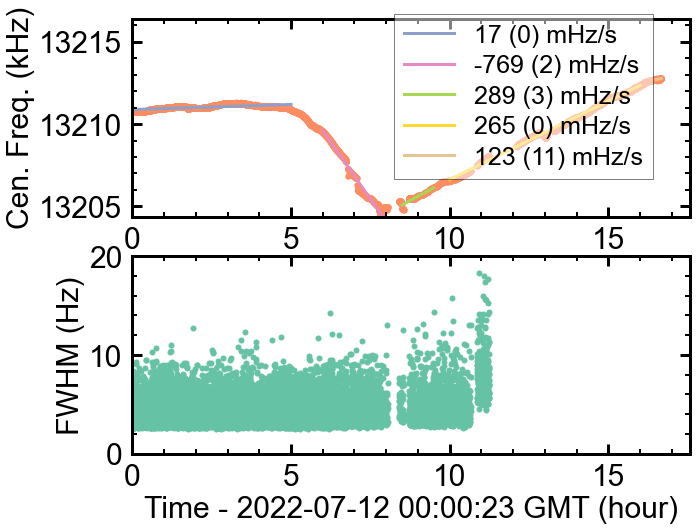

In [587]:
# figure
colors = sns.color_palette("Set2") # best color profile I see so far.
f = plt.figure()
ax = f.add_subplot(211)
ax.set_ylabel('Cen. Freq. (kHz)')
ax.errorbar(corrected_time/3600,center/1e3,yerr=dcenter/1e3,fmt='o',color=colors[1],zorder=0)
ax.set_xlim(left=0)
try:
    
    estimate_drift_rate(corrected_time,center,0*3600,5*3600,ax=ax,x0=0,colors=colors[2])
    estimate_drift_rate(corrected_time,center,6*3600,8*3600,ax=ax,x0=0,colors=colors[3])
    estimate_drift_rate(corrected_time,center,8.5*3600,9.5*3600,ax=ax,x0=0,colors=colors[4])
    estimate_drift_rate(corrected_time,center,10*3600,16*3600,ax=ax,x0=0,colors=colors[5])
    estimate_drift_rate(corrected_time,center,16.5*3600,24*3600,ax=ax,x0=0,colors=colors[6])
except:
    pass
ax.set_ylim(np.mean(center/1e3)-6,np.mean(center/1e3)+6)
ax.legend(loc='best')
ax1 = f.add_subplot(212)
ax1.errorbar(corrected_time/3600,fwhm,yerr=dfwhm,fmt='o',color=colors[0])
ax1.set_xlabel('Time - %s GMT (hour)'%time_zero2)
ax1.set_ylabel('FWHM (Hz)')
ax1.set_ylim(bottom=0,top=20)
ax1.set_xlim(left=0)
# f.savefig(saved_filename[:-4]+'_summary.png',dpi=100,bbox_inches='tight',facecolor='white')

# Overlap the drift rate and temperature

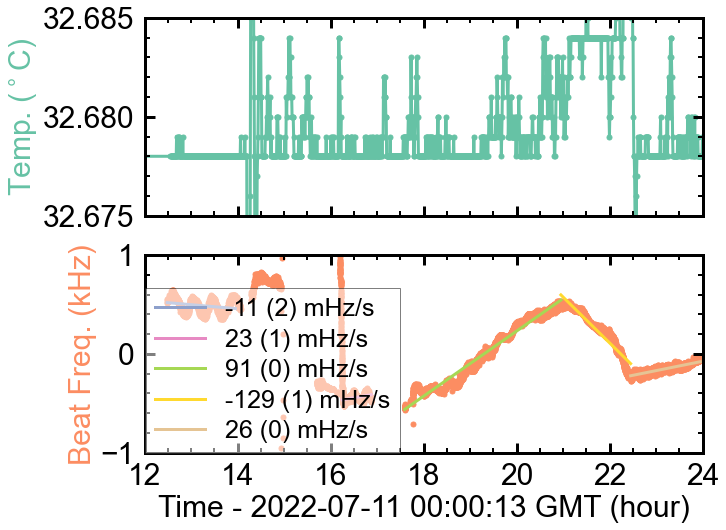

In [439]:
f= plt.figure()
ax1  =f.add_subplot(211)
ax  =f.add_subplot(212)
ax1.plot(time_s/3600,temperature_celcius,'o-',color=colors[0],zorder=1,markersize=5)
ax1.set_ylabel('Temp. ($^\circ$C)',color=colors[0])
ax1.set_ylim(32.675,32.685)
ax1.set_xlim(left=12,right=24)
ax1.set_xticklabels([])
ax.set_ylabel('Beat Freq. (kHz)',color=colors[1])

estimate_drift_rate(corrected_time,center-np.mean(center),12*3600,14*3600,ax=ax,x0=0.05,colors=colors[2])
estimate_drift_rate(corrected_time,center-np.mean(center),16.3*3600,17*3600,ax=ax,x0=0.05,colors=colors[3])
estimate_drift_rate(corrected_time,center-np.mean(center),17.5*3600,21*3600,ax=ax,x0=0.05,colors=colors[4])
estimate_drift_rate(corrected_time,center-np.mean(center),21*3600,22.5*3600,ax=ax,x0=0.05,colors=colors[5])
estimate_drift_rate(corrected_time,center-np.mean(center),22.5*3600,24*3600,ax=ax,x0=0.05,colors=colors[6])

ax.errorbar(corrected_time/3600-0.05,(center-np.mean(center))/1e3,yerr=dcenter/1e3,fmt='o',color=colors[1],zorder=0.,markersize=5)
ax.set_xlim(left=12,right=24)
ax.set_ylim(-1,1)
ax.legend(loc='lower left',borderaxespad=0)
ax.set_xlabel('Time - %s GMT (hour)'%time_zero2)
# f.savefig(filename[:-4]+'_correlate_w_temp.png',dpi=100,bbox_inches='tight',facecolor='white')

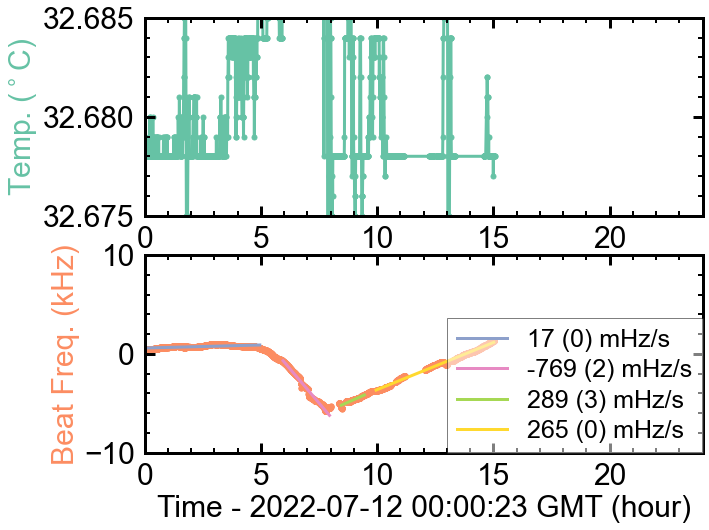

In [575]:
f= plt.figure()
ax1  =f.add_subplot(211)
ax  =f.add_subplot(212)
ax1.plot(time_s/3600,temperature_celcius,'o-',color=colors[0],zorder=1,markersize=5)
ax1.set_ylabel('Temp. ($^\circ$C)',color=colors[0])
ax1.set_ylim(32.675,32.685)
ax1.set_xlim(left=0,right=24)
# ax1.set_xticklabels([])
ax.set_ylabel('Beat Freq. (kHz)',color=colors[1])

    
estimate_drift_rate(corrected_time,center-np.mean(center),0*3600,5*3600,ax=ax,x0=0.05,colors=colors[2])
estimate_drift_rate(corrected_time,center-np.mean(center),6*3600,8*3600,ax=ax,x0=0.05,colors=colors[3])
estimate_drift_rate(corrected_time,center-np.mean(center),8.5*3600,9.5*3600,ax=ax,x0=0.05,colors=colors[4])
estimate_drift_rate(corrected_time,center-np.mean(center),10*3600,22.5*3600,ax=ax,x0=0.05,colors=colors[5])
# estimate_drift_rate(corrected_time,center-np.mean(center),22.5*3600,24*3600,ax=ax,x0=0.05,colors=colors[6])

ax.errorbar(corrected_time/3600-0.05,(center-np.mean(center))/1e3,yerr=dcenter/1e3,fmt='o',color=colors[1],zorder=0.,markersize=5)
ax.set_xlim(left=0,right=24)
ax.set_ylim(-10,10)
ax.legend(loc='lower right',borderaxespad=0)
ax.set_xlabel('Time - %s GMT (hour)'%time_zero2)
f.savefig(saved_filename[:-4]+'_correlate_w_temp.png',dpi=100,bbox_inches='tight',facecolor='white')

# ISEG data

In [174]:
# ISEG data analysis
directory = r'Z:\qfc\Electronics\HighVoltage_Addition_22V'
flst = glob1(directory,'*ch3*.dat')
voltages = []
current = []
times_s = []
for j in range(len(flst)):
    filename = os.path.join(directory,flst[j])
    data = np.loadtxt(filename)
    voltages.append(data[:,0])
    current.append(data[:,1])
    times_s.append(data[:,-1]/1e3)
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.plot(times_s[j],voltages[j],'o-',color=colors[0])
    f.savefig(filename[:-4]+'.png',dpi=100,bbox_inches='tight')
    plt.close('all')

In [175]:
flst

['iseg_data_zxk_260V_fast_ch3.dat',
 'iseg_data_zxk_fastch3.dat',
 'iseg_data_zxk_not_conenctch3.dat',
 'iseg_data_zxk_slowch3.dat']

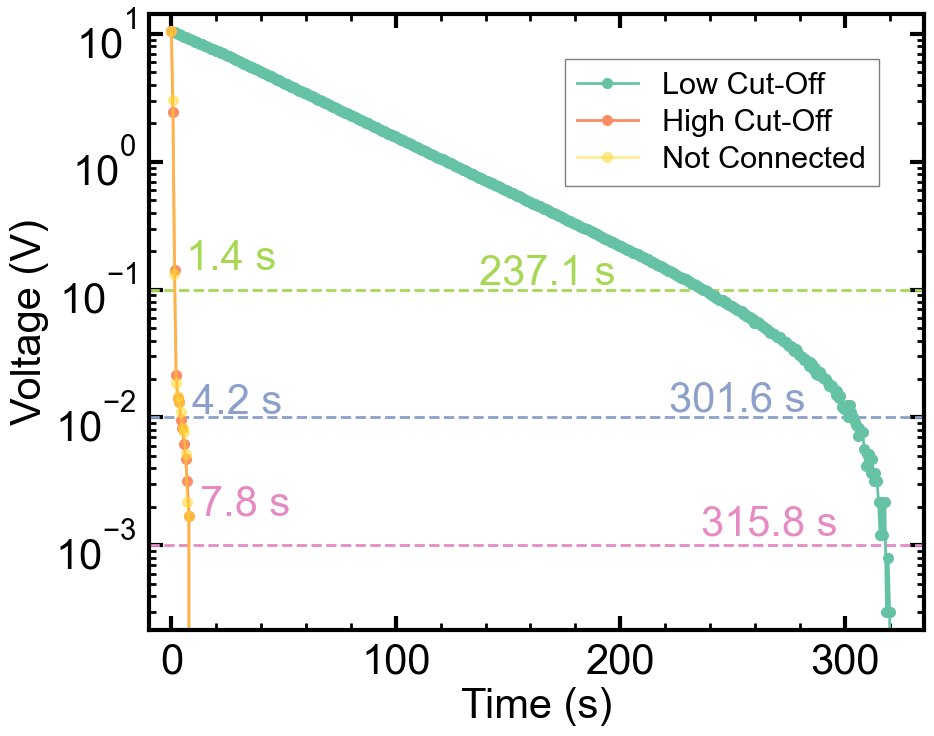

In [182]:
# comparing between the two low and high cut off data

def find_cut_off(xdata,ydata,cutoff=1e-2):
    index = np.argmin(abs(ydata-cutoff))
    return xdata[index],ydata[index]

f = plt.figure()
ax = f.add_subplot(111)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.axhline(y=1e-1,color=colors[4],ls='--',)
ax.axhline(y=1e-2,color=colors[2],ls='--',)
ax.axhline(y=1e-3,color=colors[3],ls='--',)
start_low = np.searchsorted(times_s[-1],13)
start_high = np.searchsorted(times_s[1],18.8)
start_notconnect = np.searchsorted(times_s[2],15)
ax.plot(times_s[-1][start_low:]-times_s[-1][start_low],voltages[-1][start_low:],'o-',color=colors[0],label='Low Cut-Off')
ax.plot(times_s[1][start_high:]-times_s[1][start_high],voltages[1][start_high:],'o-',color=colors[1],label='High Cut-Off')
ax.plot(times_s[2][start_notconnect:-2]-times_s[2][start_notconnect],voltages[2][start_notconnect:-2],'o-',color=colors[5],label='Not Connected',alpha=0.5)
cutoff_10dB = find_cut_off(times_s[-1][start_low:]-times_s[-1][start_low],voltages[-1][start_low:],cutoff=1e-1)
cutoff_20dB = find_cut_off(times_s[-1][start_low:]-times_s[-1][start_low],voltages[-1][start_low:],cutoff=1e-2)
cutoff_30dB = find_cut_off(times_s[-1][start_low:]-times_s[-1][start_low],voltages[-1][start_low:],cutoff=1e-3)
ax.text(cutoff_10dB[0]-100,cutoff_10dB[1]*1.1,'%.1f s'%cutoff_10dB[0],color=colors[4])
ax.text(cutoff_20dB[0]-80,cutoff_20dB[1]*1.1,'%.1f s'%cutoff_20dB[0],color=colors[2])
ax.text(cutoff_30dB[0]-80,cutoff_30dB[1],'%.1f s'%cutoff_30dB[0],color=colors[3])

cutoff_10dB = find_cut_off(times_s[1][start_high:]-times_s[1][start_high],voltages[1][start_high:],cutoff=1e-1)
cutoff_20dB = find_cut_off(times_s[1][start_high:]-times_s[1][start_high],voltages[1][start_high:],cutoff=1e-2)
cutoff_30dB = find_cut_off(times_s[1][start_high:]-times_s[1][start_high],voltages[1][start_high:],cutoff=1e-3)
ax.text(cutoff_20dB[0]+5,cutoff_20dB[1]*1.1,'%.1f s'%cutoff_20dB[0],color=colors[2])
ax.text(cutoff_10dB[0]+5,cutoff_10dB[1],'%.1f s'%cutoff_10dB[0],color=colors[4])
ax.text(cutoff_30dB[0]+5,cutoff_30dB[1],'%.1f s'%cutoff_30dB[0],color=colors[3])

ax.legend(loc='best')

ax.set_yscale('log')
f.savefig(os.path.join(directory,'28092022_iseg_data_zxk_ch3_summary.png'),dpi=200,bbox_inches='tight')

# Ring down comparison

In [36]:
directory = r'C:\Users\zxk94\Pictures'
flst = glob1(directory,'*data*.csv')
from lmfit.models import ExponentialModel,ConstantModel

[[Model]]
    (Model(exponential) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 171
    # variables        = 3
    chi-square         = 136.874448
    reduced chi-square = 0.81472886
    Akaike info crit   = -32.0645124
    Bayesian info crit = -22.6395217
[[Variables]]
    amplitude:  35.9603558 +/- 0.48594386 (1.35%) (init = 5.622845)
    decay:      0.67482520 +/- 0.01482955 (2.20%) (init = 5)
    c:         -22.1895341 +/- 0.12635756 (0.57%) (init = -16.54542)
[[Correlations]] (unreported correlations are < 0.100)
    C(decay, c)         = -0.719
    C(amplitude, decay) = -0.701
    C(amplitude, c)     = 0.197
[[Model]]
    (Model(exponential) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 126
    # variables        = 3
    chi-square         = 84.8670343
    reduced chi-square = 0.68997589
    Akaike info crit   = -43.7947184
  

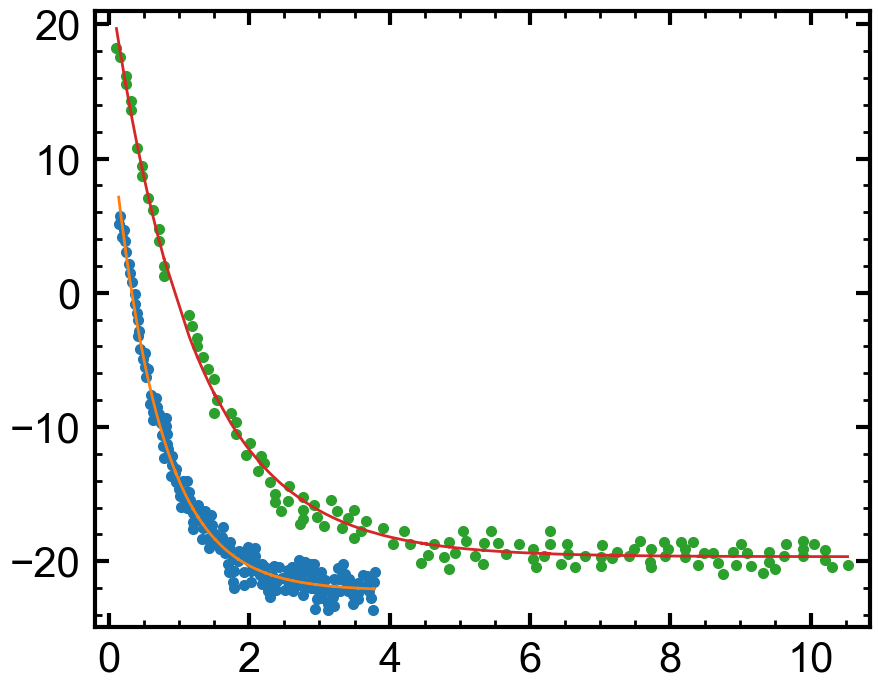

In [62]:
time_us = []
voltage_mV = []
fit_results = []
for j in range(len(flst)):
    filename = os.path.join(directory,flst[j])
    df = pd.read_csv(filename, header=None)
    time_us.append(df[df.columns[0]])
    voltage_mV.append(df[df.columns[1]])
    x0 = time_us[j][np.argmax(voltage_mV[j])]
    x = time_us[j]-x0
    start = np.searchsorted(x,0.1)
    y = voltage_mV[j]
    mod = ExponentialModel()
    con = ConstantModel()
    params = mod.guess(y[start:],x=x[start:])+con.guess(y[start:],x=x[start:])
    mod += con
    params['amplitude'].set(min=0)
    params['decay'].set(min=0,value=5)
    result = mod.fit(y[start:],params,x=x[start:])
    fit_results.append(result.params)
    plt.plot(x[start:],y[start:],'o')
    plt.plot(x[start:],result.best_fit)
    print (result.fit_report())

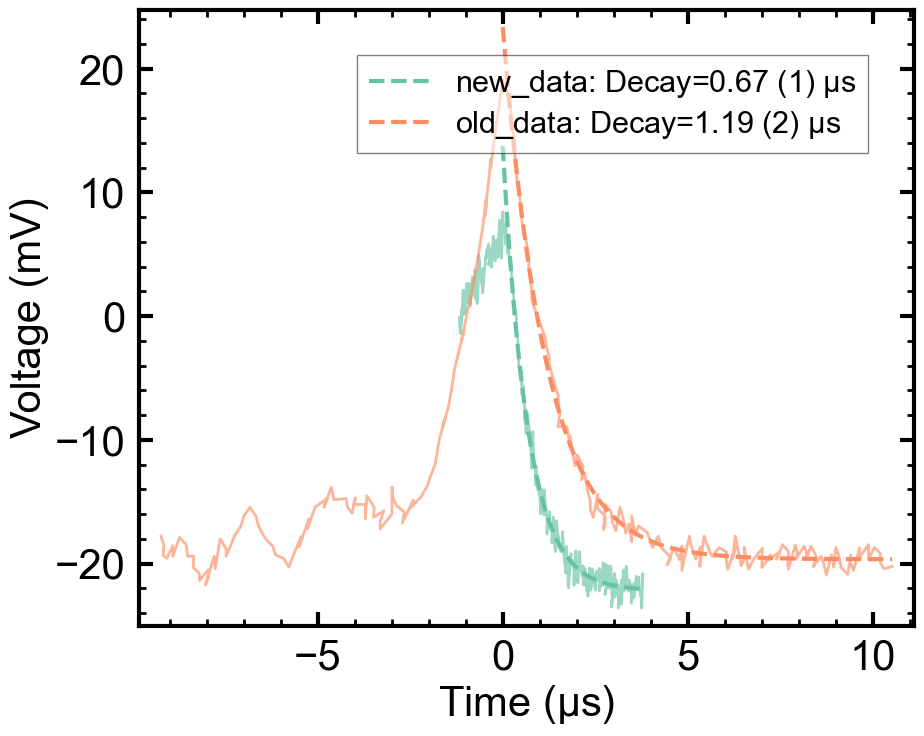

In [68]:
f = plt.figure()
ax = f.add_subplot(111)
for j in range(len(time_us)):
    x0 = time_us[j][np.argmax(voltage_mV[j])]
    ax.plot(time_us[j]-x0,voltage_mV[j],color=colors[j],alpha=0.65)
    x = np.linspace(0,max(time_us[j]-x0),100)
    ax.plot(x,mod.eval(fit_results[j],x=x),color=colors[j],ls='--',lw=3,label='%s: Decay=%.2f (%.0f) $\mathregular{\mu}$s'
            %(flst[j][:-4],fit_results[j]['decay'].value,1e2*fit_results[j]['decay'].stderr))
ax.legend(loc='best')   
ax.set_xlabel('Time ($\mathregular{\mu}$s)')
ax.set_ylabel('Voltage (mV)')
f.savefig(filename[:-4]+'_summary.png',dpi=100,bbox_inches='tight',facecolor='white')

# QSIM Beat data analysis (.mat and .txt files)

In [36]:
directory = r'Z:\qfc\measurements\general\2022\2022_QFC_QSIM_Beats'
flst = glob1(directory,'*beatspectrum*.txt')
for j in range(0,len(flst),2):
    print (flst[j])
    filename = os.path.join(directory,flst[j])
    amp = np.loadtxt(filename,delimiter=' ')
    filename = os.path.join(directory,flst[j+1])
    freq = np.loadtxt(filename,delimiter=' ')
    f = plt.figure()
    ax = f.add_subplot(111)
    ax.plot(freq[0]/1e6,amp.mean(axis=0),color=colors[0],lw=3)
    ax.set_yscale('log')
    ax.set_xlabel('Freq (MHz)')
    ax.set_ylabel('Amplitude')
    f.savefig(filename[:-4]+'_summary.png',dpi=100,bbox_inches='tight',facecolor='white')
    plt.close('all')

20220923_QSIM_QFC_beatspectrum_1mHz_amp.txt
20220923_QSIM_QFC_beatspectrum_amp.txt


In [51]:
directory = r'Z:\qfc\measurements\general\2022\2022_QFC_QSIM_Beats'
flst = glob1(directory,'*beatspectrum*.mat')
for j in range(len(flst)):
    print (flst[j])
    filename = os.path.join(directory,flst[j])
    from scipy.io import loadmat
    data = loadmat(filename)
    time_s = data['time_in_s'][0]
    spectrum = data['spectrum']
    freq_Hz = data['frequency_Hz'][0]

20220923_QSIM_QFC_beatspectrum_1khz.mat


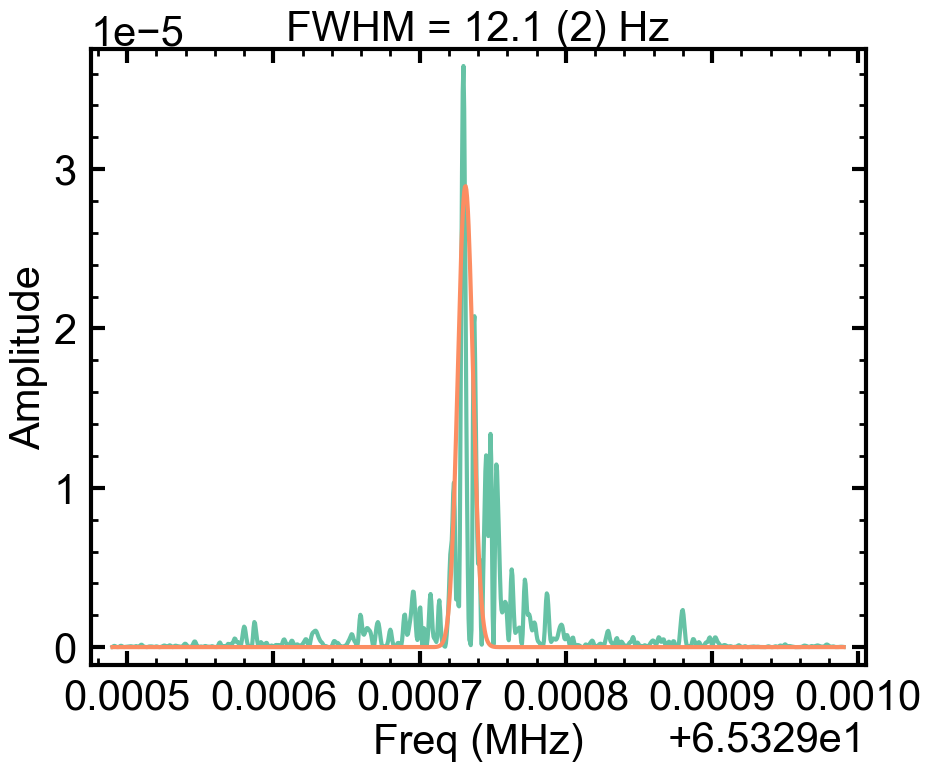

In [85]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(freq_Hz/1e6,spectrum[0],color=colors[0],lw=3)
from lmfit.models import GaussianModel
mod = GaussianModel()
params = mod.guess(spectrum[0],x=freq_Hz)
result = mod.fit(spectrum[0],params,x=freq_Hz,weights=np.sqrt(spectrum[0]))
ax.plot(freq_Hz/1e6,result.best_fit,color=colors[1],lw=3)
ax.set_xlabel('Freq (MHz)')
ax.set_ylabel('Amplitude')
ax.set_title('FWHM = {0:.1f} ({1:.0f}) Hz'.format(result.params['fwhm'].value,10*result.params['fwhm'].stderr))
f.savefig(filename[:-4]+'_summary.png',dpi=100,bbox_inches='tight',facecolor='white')

# Low Pass Filter and Attenuation

[[Model]]
    Model(heating_rate_fit2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 2
    chi-square         = 53.7635692
    reduced chi-square = 17.9211897
    Akaike info crit   = 15.8757909
    Bayesian info crit = 15.0946667
[[Variables]]
    amp:  0.44441088 +/- 0.07535308 (16.96%) (init = 1)
    f0:   1074.40463 +/- 2.58075545 (0.24%) (init = 1074)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, f0) = -0.992
9.78347466058833


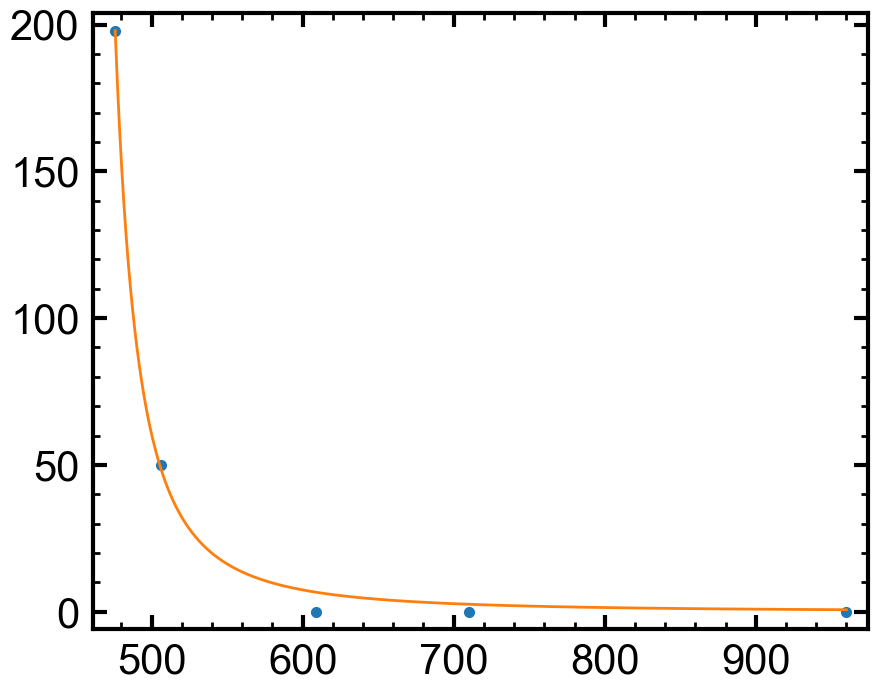

In [132]:
def rc_low_pass_transfer_function(f,f0):
    w0 = 2*np.pi*f0
    return 1/(1+f/w0)

# marco's data

f = np.array([475.8564682441628, 506.357,608.72,710,960])
heatingrate = np.array([197.7967806841046,50.016,0,0,0])

plt.plot(f,heatingrate,'o')

from lmfit import Model

def heating_rate_fit(x,x0,amp,order):
    return amp/(x-x0)**(order)

def heating_rate_fit2(x,amp,f0):
    return amp*rc_low_pass_transfer_function(x-f0,100)**2

mod = Model(heating_rate_fit)
params = mod.make_params(amp=10000,x0=470,order=2)
params['order'].set(vary=False)
res = mod.fit(heatingrate,params,x=f)
# print (res.fit_report())

mod1 = Model(heating_rate_fit2)
params1 = mod1.make_params(amp=1,f0=1074)
# params1['amp'].set(vary=False)
res1 = mod1.fit(heatingrate,params1,x=f)
print (res1.fit_report())


dummyf = np.linspace(min(f),max(f),1000)
# plt.plot(dummyf,mod.eval(res.params,x=dummyf),'-')
# plt.plot(dummyf,mod1.eval(params1,x=dummyf),'--')
plt.plot(dummyf,mod1.eval(res1.params,x=dummyf))
print (mod1.eval(res1.params,x=580))

Cut off at 293.32 kHz


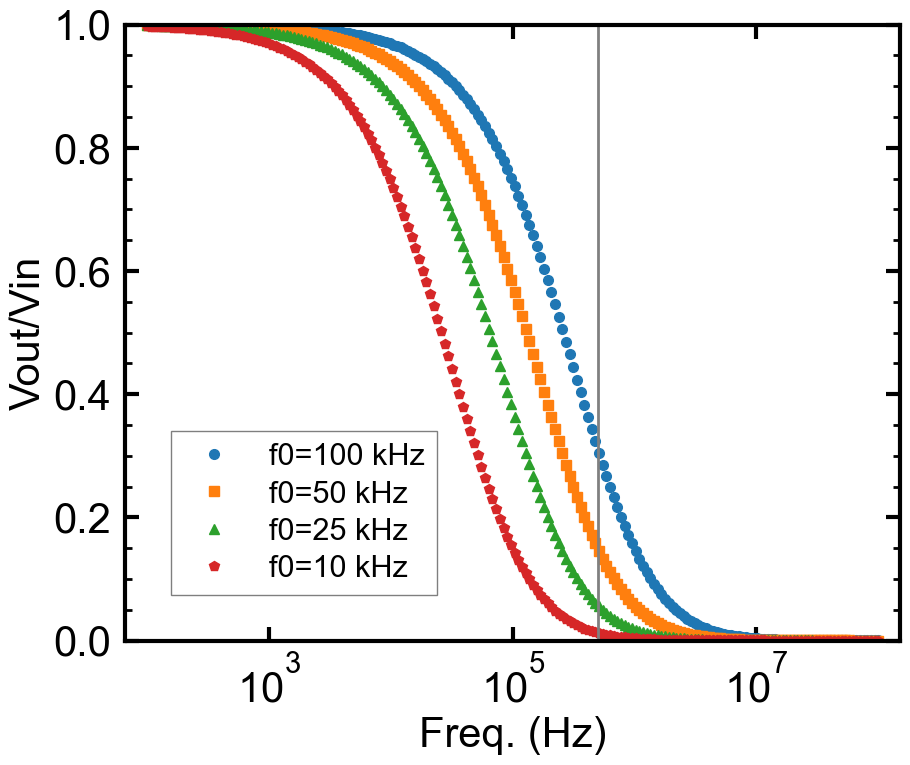

In [133]:
f = np.logspace(2,8,200)
f0 = 100e3
# r = 100e3
# c = 15e-12
vout = rc_low_pass_transfer_function(f,f0)**2
vout1 = rc_low_pass_transfer_function(f,f0/2)**2
vout2 = rc_low_pass_transfer_function(f,f0/4)**2
vout3 = rc_low_pass_transfer_function(f,f0/10)**2


# plt.axhline(y=0.841395,color='grey',alpha=0.5) # - 1.5 dB
# plt.axvline(x=f0,color='grey',alpha=0.5)
plt.plot(f,vout,'o',label='f0=100 kHz')
plt.plot(f,vout1,'s',label='f0=50 kHz')
plt.plot(f,vout2,'^',label='f0=25 kHz')
plt.plot(f,vout3,'p',label='f0=10 kHz')
plt.ylim(0,1)
plt.legend(loc='best')
plt.axvline(x=500e3,color='grey')
plt.ylabel('Vout/Vin')
plt.xlabel('Freq. (Hz)')


plt.xscale('log')



try:
    index = np.where(abs(vout-1/np.e)<0.1)[0][0]
    print ('Cut off at %.5g kHz'% (f[index]/1e3))
except Exception as ep:
    print (ep)

In [134]:
def rise_time_zero2alpha(fcut,alpha=0.99):
    return -1*np.log(1-alpha)/fcut/2/np.pi

1e6*rise_time_zero2alpha(106.1032953945969e3,alpha=0.999)

10.361632918473203

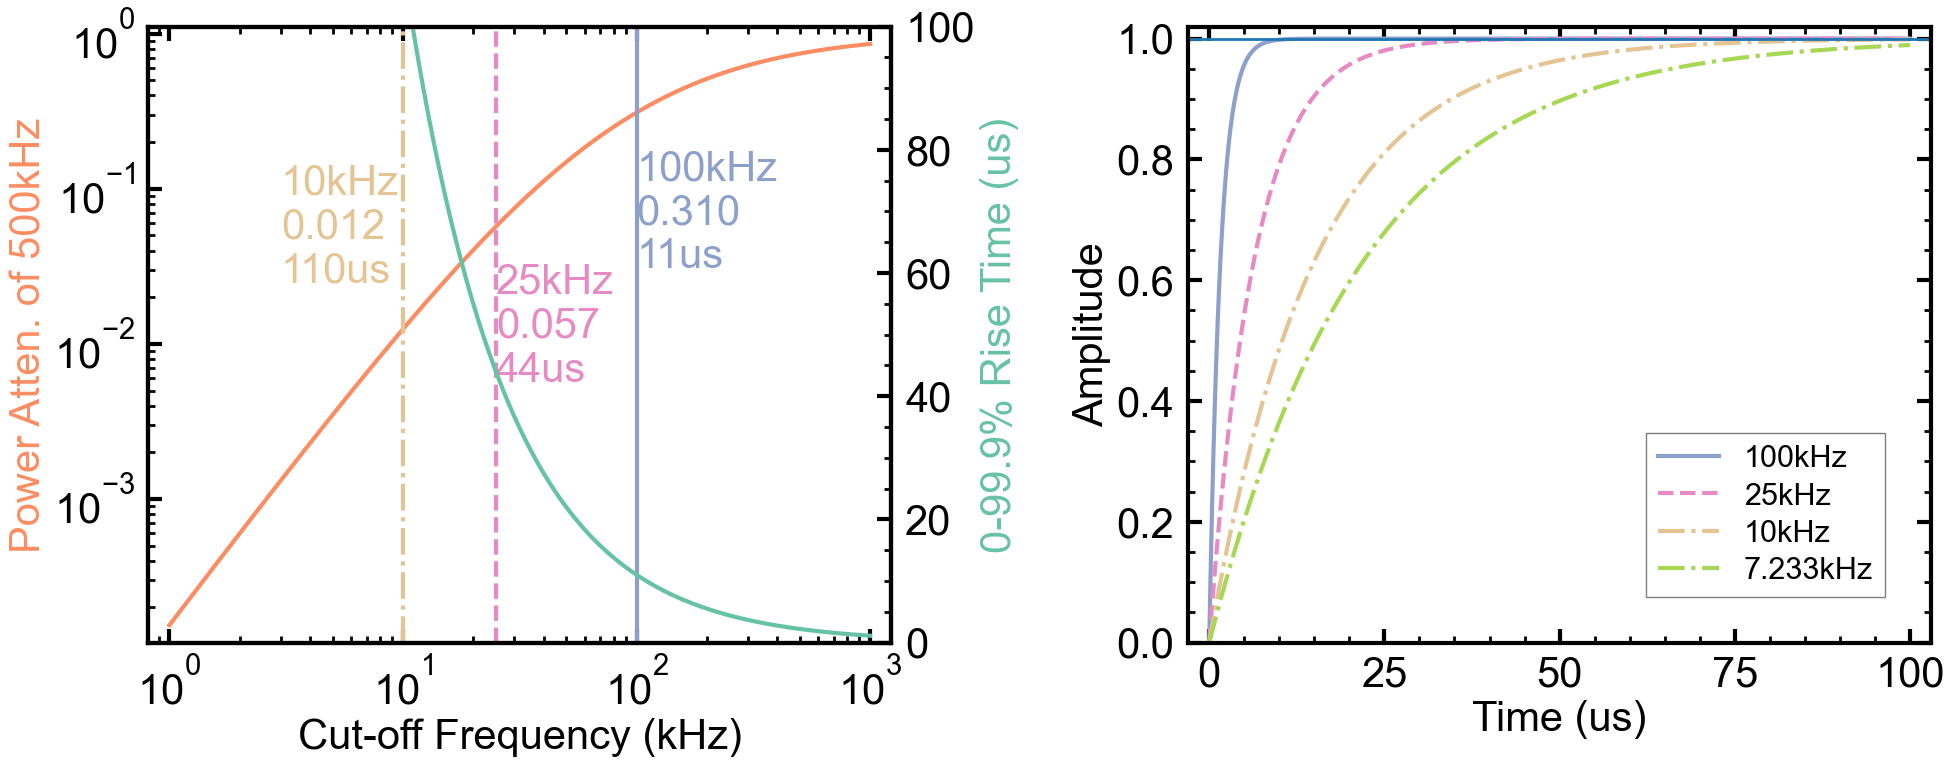

In [135]:
ff = np.logspace(np.log10(1e3),np.log10(1000e3),150)
power_ratio = rc_low_pass_transfer_function(500e3,f0=ff)**2#/rc_low_pass_transfer_function(500e3,f0=100e3)**2
f= plt.figure(figsize=(23,8))
f.subplots_adjust(wspace=0.4)
ax = f.add_subplot(121)
ax1 = ax.twinx()
ax1.set_ylabel('0-99.9% Rise Time (us)',color=colors[0])
ax1.set_ylim(0,100)
#ax1.plot(ff,0.35*1e6/ff,'^-',color=colors[0]) #10to90
ax1.plot(ff/1e3,1e6*rise_time_zero2alpha(ff,alpha=0.999),'-',color=colors[0],lw=3.)
ax.plot(ff/1e3,power_ratio,'-',color=colors[1],lw=3.)
ax.set_xscale('log')
ax.axvline(x=100,color=colors[2],lw=3.)
ax.axvline(x=25,color=colors[3],ls='--',lw=3.)
ax.axvline(x=10,color=colors[6],ls='-.',lw=3.)
ax.text(100,0.1*rc_low_pass_transfer_function(500e3,f0=100e3)**2,'100kHz\n%.3f\n%.0fus'%(rc_low_pass_transfer_function(500e3,f0=100e3)**2,1e6*rise_time_zero2alpha(100e3,alpha=0.999)),color=colors[2])
ax.text(25,0.1*rc_low_pass_transfer_function(500e3,f0=25e3)**2,
         s='25kHz\n%.3f\n%.0fus'%(rc_low_pass_transfer_function(500e3,f0=25e3)**2,1e6*rise_time_zero2alpha(25e3,alpha=0.999)),
       color=colors[3])
ax.text(3.,2*rc_low_pass_transfer_function(500e3,f0=10e3)**2,
         s='10kHz\n%.3f\n%.0fus'%(rc_low_pass_transfer_function(500e3,f0=10e3)**2,1e6*rise_time_zero2alpha(10e3,alpha=0.999)),
       color=colors[6])

ax.set_yscale('log')
ax.set_xlabel('Cut-off Frequency (kHz)')
ax.set_ylabel('Power Atten. of 500kHz',color=colors[1])

ax2 = f.add_subplot(122)

tt = np.linspace(0,100e-6,1000)
ax2.plot(tt*1e6,1-np.exp(-tt*2*np.pi*100e3),color=colors[2],lw=3.,label='100kHz')
ax2.plot(tt*1e6,1-np.exp(-tt*2*np.pi*25e3),ls='--',color=colors[3],lw=3,label='25kHz')
ax2.plot(tt*1e6,1-np.exp(-tt*2*np.pi*10.6e3),ls='-.',color=colors[6],lw=3.,label='10kHz')
ax2.plot(tt*1e6,1-np.exp(-tt*2*np.pi*7.233e3),ls='-.',color=colors[4],lw=3.,label='7.233kHz')
ax2.legend(loc='best')
ax2.set_xlabel('Time (us)')
ax2.set_ylabel('Amplitude')
ax2.set_ylim(0,1.02)
ax2.axhline(y=0.999)
# f.savefig('Z:\qfc\Electronics\Gerhard_FilterBoard_Ion\CutoffFreq_PowerAtten_RiseTime.png',dpi=100,bbox_inches='tight',facecolor='white')

In [18]:
filename = r'Z:\qfc\Electronics\HighVoltage_Addition_22V\09112022\09112022_ISEG_DCDC_3.csv'
df = pd.read_csv(filename,skiprows=3)

In [23]:
time_s = np.array(df[df.columns[0]])
chn1_V = np.array(df[df.columns[1]])
chn2_V = np.array(df[df.columns[2]])

In [86]:
def rc_voltage_response(x,amp,c,fcut):
    return amp*(1-np.exp(-x*2*np.pi*fcut))+c

def rc_voltage_step(x,x0,amp,c,fcut):
    return np.piecewise(x,[x < x0, x >= x0], [lambda x: c, lambda x: rc_voltage_response(x-x0,amp,c,fcut)])

In [178]:
def fit_rc_voltage_step(x,y):
    start = np.searchsorted(x,-50e-6)
    stop = np.searchsorted(x,150e-6)
    mod = Model(rc_voltage_step)
    params = mod.make_params(amp=6,c=min(y[start:stop]),fcut=25e3,x0=0)
    # params['c'].set(vary=False)
    result = mod.fit(y[start:stop],params,x=x[start:stop])
    print (result.fit_report())
    print ('Rise time 0 to 99.9 is %.3f us'%(1e6*rise_time_zero2alpha(result.params['fcut'].value,alpha=0.999)))
    dummyx = np.linspace(x[start],x[stop],1000)
    yfit = mod.eval(result.params,x=dummyx)
    index = np.where(abs(y[start:stop]-result.params['c'].value -0.999*result.params['amp'].value)<0.06)[0][0]
    labelstr = '0-%.3f Rise Time is %.1f us'%(y[start:stop][index]/max(y[start:stop]),1e6*x[start:stop][index])
    print (labelstr)
    return result,dummyx,yfit,labelstr

[[Model]]
    Model(rc_voltage_step)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31250
    # variables        = 4
    chi-square         = 529.270733
    reduced chi-square = 0.01693883
    Akaike info crit   = -127438.080
    Bayesian info crit = -127404.681
[[Variables]]
    x0:   -1.3652e-06 +/- 1.3634e-08 (1.00%) (init = 0)
    amp:   7.02500016 +/- 0.00190115 (0.03%) (init = 6)
    c:     28.9230511 +/- 0.00149301 (0.01%) (init = 28.65015)
    fcut:  8665.61803 +/- 10.2597693 (0.12%) (init = 25000)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, c)    = -0.785
    C(x0, fcut)  = 0.670
    C(x0, amp)   = -0.363
    C(amp, fcut) = -0.349
    C(x0, c)     = 0.286
Rise time 0 to 99.9 is 126.870 us
0-0.994 Rise Time is 52.5 us
[[Model]]
    Model(rc_voltage_step)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 31250
    # variables        = 4
    chi-s

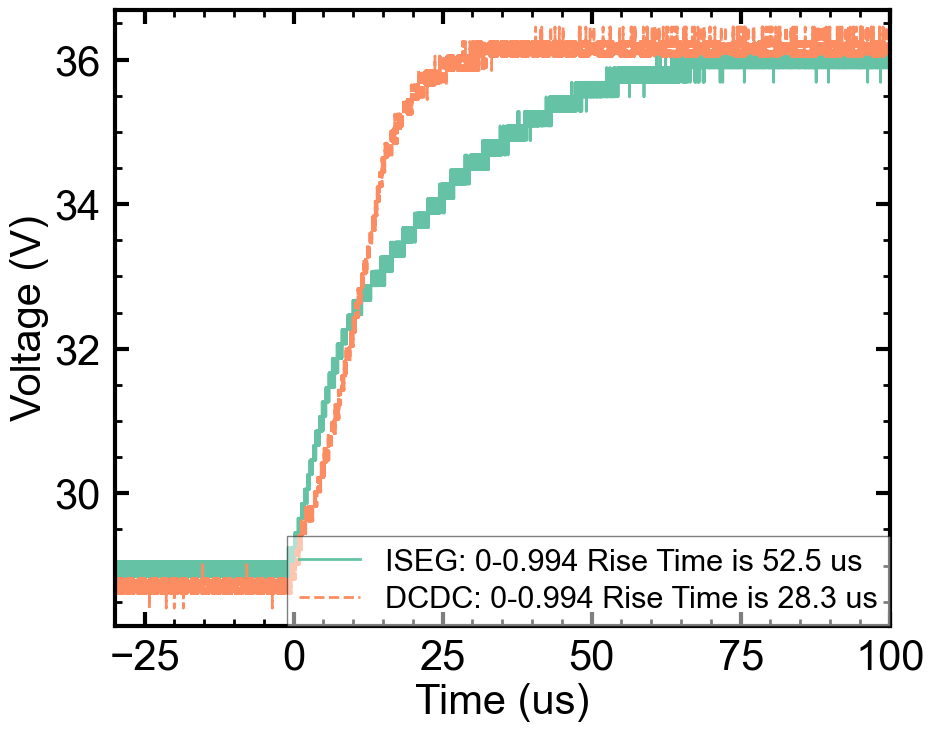

In [180]:
f = plt.figure()
ax = f.add_subplot(111)
result, dummyx,yfit,labelstr = fit_rc_voltage_step(x=time_s+10e-6,y=chn1_V)
ax.plot(time_s*1e6+10,chn1_V,'-',color=colors[0],label='ISEG: '+labelstr)

result, dummyx,yfit,labelstr = fit_rc_voltage_step(x=time_s-490e-6,y=chn2_V)
ax.plot(time_s*1e6-490,chn2_V,'--',color=colors[1],label='DCDC: '+labelstr)

ax.set_xlim(-30,100)
ax.legend(loc='lower right',borderaxespad =0)
ax.set_xlabel('Time (us)')
ax.set_ylabel('Voltage (V)')
f.savefig(filename[:-4]+'_risetime.png',dpi=100,bbox_inches='tight',facecolor='white')

# radial_freq_calibration_w_attenuator


In [3]:
filename1 = r'C:\Users\zxk94\Downloads\Radial_Mode_Calibration_2022-09-23.csv'
filename2 = r'C:\Users\zxk94\Downloads\Radial_Mode_Calibration.csv'
attenuation_dB = np.array([9,10])
data1 = pd.read_csv(filename1,header=None)
data2 = pd.read_csv(filename2,header=None)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 1.4846e-05
    reduced chi-square = 2.9692e-06
    Akaike info crit   = -87.4457202
    Bayesian info crit = -87.5538999
[[Variables]]
    slope:      0.00307223 +/- 6.0216e-06 (0.20%) (init = 0.003072228)
    intercept: -0.12214277 +/- 0.00495199 (4.05%) (init = -0.1221428)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.991
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 4.6809e-05
    reduced chi-square = 9.3618e-06
    Akaike info crit   = -79.4073876
    Bayesian info crit = -79.5155673
[[Variables]]
    slope:      0.00344350 +/- 1.3635e-05 (0.40%) (init = 0.003443504)
    intercept: -0.06527780 +/- 0.00977394 (14.97%) (init =

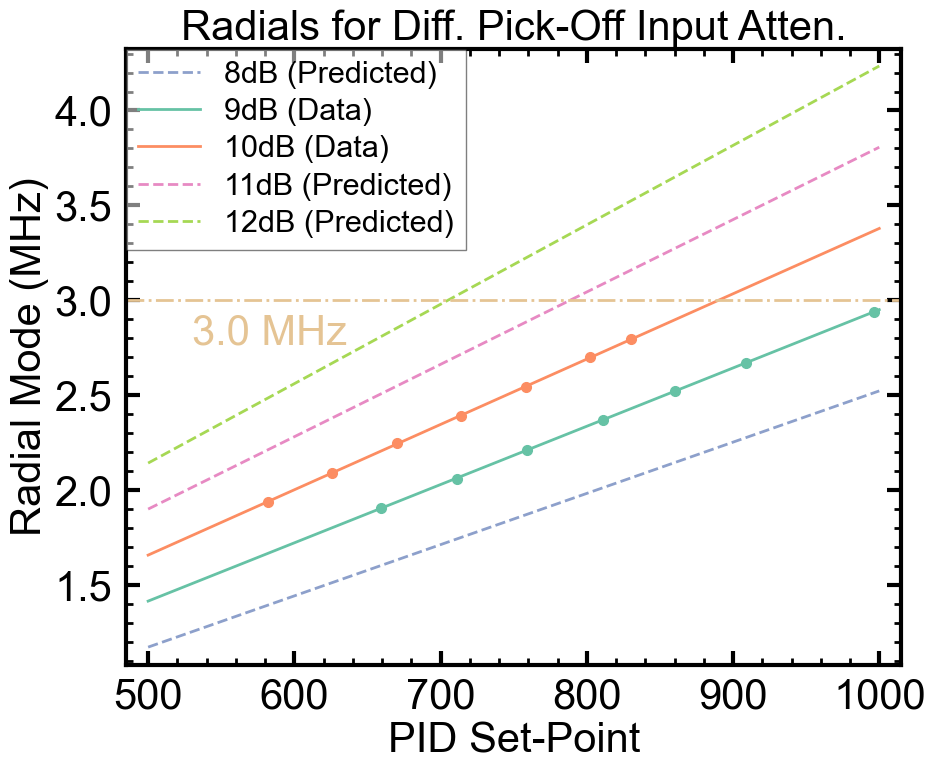

In [120]:
f = plt.figure()
ax = f.add_subplot(111)



from lmfit.models import LinearModel
x = data1[data1.columns[0]]
y = (data1[data1.columns[1]]+data1[data1.columns[2]])/2

ax.plot(x,y,'o',zorder=1,color=colors[0])
mod = LinearModel()
params = mod.guess(y,x=x)
result = mod.fit(y,params,x=x)
dummyx = np.linspace(500,1000,1000)

print (result.fit_report())


ax.plot(data2[data2.columns[0]],data2[data2.columns[1]],'o',zorder=1,color=colors[1])
mod = LinearModel()
params = mod.guess(data2[data2.columns[1]],x=data2[data2.columns[0]])
result1 = mod.fit(data2[data2.columns[1]],params,x=data2[data2.columns[0]])
dummyx = np.linspace(500,1000,1000)

print (result1.fit_report())

differences = mod.eval(result1.params,x=dummyx) - mod.eval(result.params,x=dummyx)


ax.plot(dummyx,mod.eval(result1.params,x=dummyx) - 2*differences,ls='--',zorder=0,color=colors[2],label='8dB (Predicted)')
ax.plot(dummyx,mod.eval(result.params,x=dummyx),zorder=0,color=colors[0],label='9dB (Data)')
ax.plot(dummyx,mod.eval(result1.params,x=dummyx),zorder=0,color=colors[1],label='10dB (Data)')
ax.plot(dummyx,mod.eval(result1.params,x=dummyx) + differences,ls='--',zorder=0,color=colors[3],label='11dB (Predicted)')
ax.plot(dummyx,mod.eval(result1.params,x=dummyx) + differences*2,ls='--',zorder=0,color=colors[4],label='12dB (Predicted)')

ax.set_xlabel('PID Set-Point')
ax.legend(loc='best',borderaxespad=0)
ax.set_ylabel('Radial Mode (MHz)')
ax.axhline(y=3.,color=colors[6],ls='-.')
ax.text(530,2.77,'3.0 MHz',color=colors[6])
ax.set_title('Radials for Diff. Pick-Off Input Atten.')
f.savefig(r'Z:\qfc\Electronics\RF_PID_Box\Predicted_Radials_vs_input_attenuation.png',dpi=100,bbox_inches='tight',facecolor='white')

# New DC electrode curve

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 1
    chi-square         = 1.3773e-04
    reduced chi-square = 3.4433e-05
    Akaike info crit   = -50.4982619
    Bayesian info crit = -50.8888240
[[Variables]]
    amplitude:  0.02860355 +/- 1.0849e-04 (0.38%) (init = 0.02562471)
    exponent:   0.5 (fixed)
0.5875922914862635


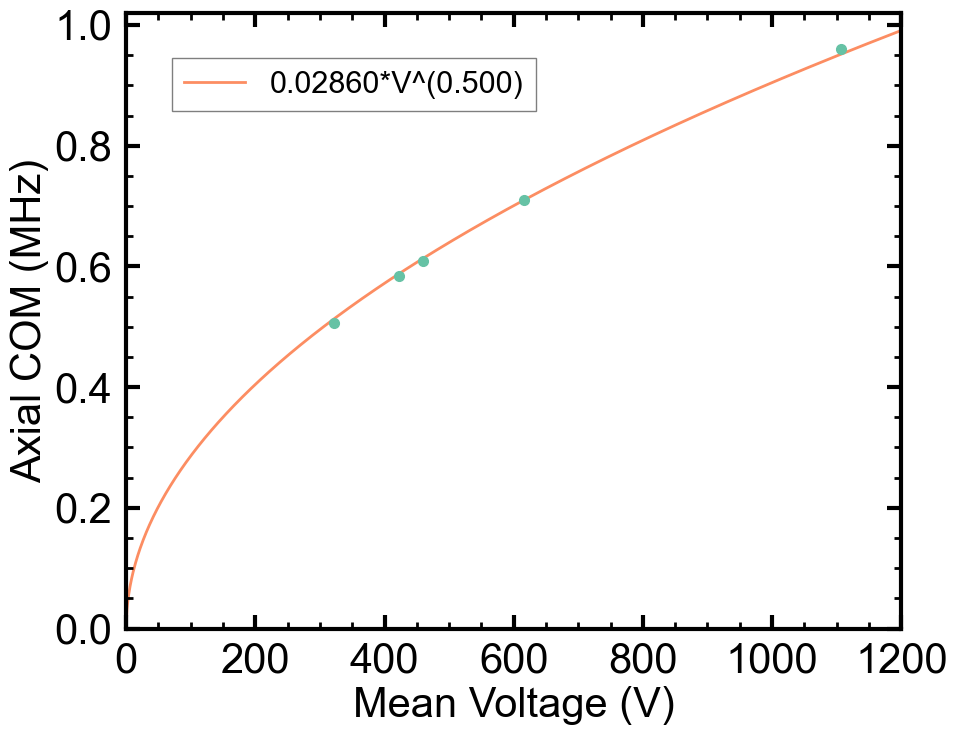

In [260]:
endcap1 = np.array([1100,608,410,450,310]) # top endcap
endcap2 = np.array([1115,623,434,469,332]) # bottom endcap
axial_MHz = np.array([0.96,0.71,0.584,0.609,0.506])
mean_voltage = (endcap1+endcap2)/2

from lmfit.models import PowerLawModel

mod = PowerLawModel()
params = mod.guess(axial_MHz,x=mean_voltage )
params['exponent'].set(value=0.5,vary=False)
result = mod.fit(axial_MHz,params,x=mean_voltage )

dummyx = np.linspace(0,1200,1000)
print (result.fit_report())
print (mod.eval(result.params,x=np.mean([410,434])))
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(mean_voltage ,axial_MHz,'o',color=colors[0],zorder=1)
ax.plot(dummyx,mod.eval(result.params,x=dummyx),label='%.5f*V^(%.3f)'%(result.params['amplitude'].value,
                                                                      result.params['exponent'].value),color=colors[1],zorder=0)
ax.set_xlim(0,1200)
ax.set_ylim(bottom=0)
ax.set_xlabel('Mean Voltage (V)')
ax.set_ylabel('Axial COM (MHz)')
ax.legend(loc='best')

In [257]:
0.02865*(422.-0.01)**(0.5)

0.5885396220943836

# Noise as a function of shunt capacitance

[[Model]]
    (Model(exponential) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 9
    # variables        = 3
    chi-square         = 28.4556185
    reduced chi-square = 4.74260309
    Akaike info crit   = 16.3600895
    Bayesian info crit = 16.9517632
[[Variables]]
    amplitude:  61.0502704 +/- 8.12713481 (13.31%) (init = 27.76785)
    decay:      0.79009186 +/- 0.13502477 (17.09%) (init = 1)
    c:          20.4418563 +/- 0.92494869 (4.52%) (init = 26.78889)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.869
    C(decay, c)         = -0.424
    C(amplitude, c)     = 0.145


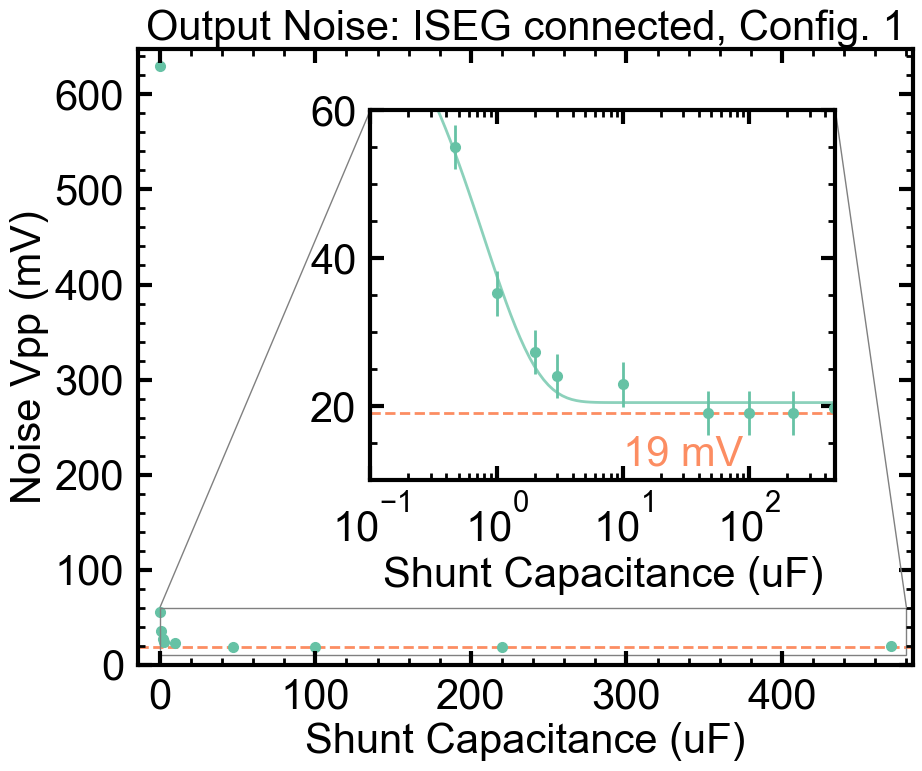

In [129]:
shunt_capacitor_uF = np.array([0,0.47,1,2,3,10,47,100,220,470])
noise_Vpp_mV = np.array([630,55,35.2,27.3,24,22.9,19,19,19,19.7])
yerr = 3*np.ones(len(noise_Vpp_mV))




f= plt.figure()
ax  =f.add_subplot(111)
ax.plot(shunt_capacitor_uF,noise_Vpp_mV,'o',color=colors[0],zorder=1)
ax.set_xlabel('Shunt Capacitance (uF)')
ax.set_ylabel('Noise Vpp (mV)')
ax.set_title('Output Noise: ISEG connected, Config. 1')
ax.set_ylim(bottom=0)
# ax.set_xlim(left=0)

from lmfit.models import ExponentialModel, ConstantModel

mod =ExponentialModel()
con = ConstantModel()
params = mod.guess(noise_Vpp_mV[1:],x=shunt_capacitor_uF[1:]) + con.guess(noise_Vpp_mV[1:],x=shunt_capacitor_uF[1:])
mod += con
# params['c'].set(value=min(noise_Vpp_mV[1:]),vary=False)
params['decay'].set(min=0,max=10,value=1)
result = mod.fit(noise_Vpp_mV[1:],params,x=shunt_capacitor_uF[1:])#,weights=1/yerr[:])
print (result.fit_report())

ax2 = plt.axes()
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.3,0.3,0.6,0.6])
ax2.set_axes_locator(ip)
ax2.errorbar(shunt_capacitor_uF,noise_Vpp_mV,yerr=yerr,fmt='o',color=colors[0],zorder=2)
dummyx = np.logspace(-1,np.log10(max(shunt_capacitor_uF)),100)
ax2.plot(dummyx,mod.eval(result.params,x=dummyx),color=colors[0],zorder=1,alpha=0.75)
ax2.set_ylim(10,60)
ax2.set_xlim(1e-1,480)
ax2.set_xscale('log')
mark_inset(ax, ax2, loc1=2, loc2=1, fc="none", ec="0.5")
ax.axhline(y=19,color=colors[1],ls='--',zorder=0)
ax2.axhline(y=19,color=colors[1],ls='--',zorder=0)
ax2.text(10,12,'19 mV',color=colors[1])
ax2.set_xlabel('Shunt Capacitance (uF)')
f.savefig(r'Z:\qfc\Electronics\HighVoltage_Addition_22V\09112022\22112022_Shunt_Capacitor_ISEG.png',dpi=100,bbox_inches='tight',
          facecolor='white')
# ax.indicate_inset_zoom(ax2, edgecolor="black")

# shuttling condition -- staircases

In [36]:
directory = r'Z:\qfc\Electronics\HighVoltage_Addition_22V\09112022'
flst = glob1(directory,'25*DC1Vpp*.npy')
flst

['25112022_ISEG_10V_DC1Vpp_10uF_AC.npy',
 '25112022_ISEG_10V_DC1Vpp_1uF_AC.npy',
 '25112022_ISEG_10V_DC1Vpp_5uF_AC.npy',
 '25112022_ISEG_10V_DC1Vpp_6uF_AC.npy']

In [42]:
filename = os.path.join(directory,flst[1])
data =np.load(filename)

filename1 = os.path.join(directory,flst[0])
data1 =np.load(filename1)

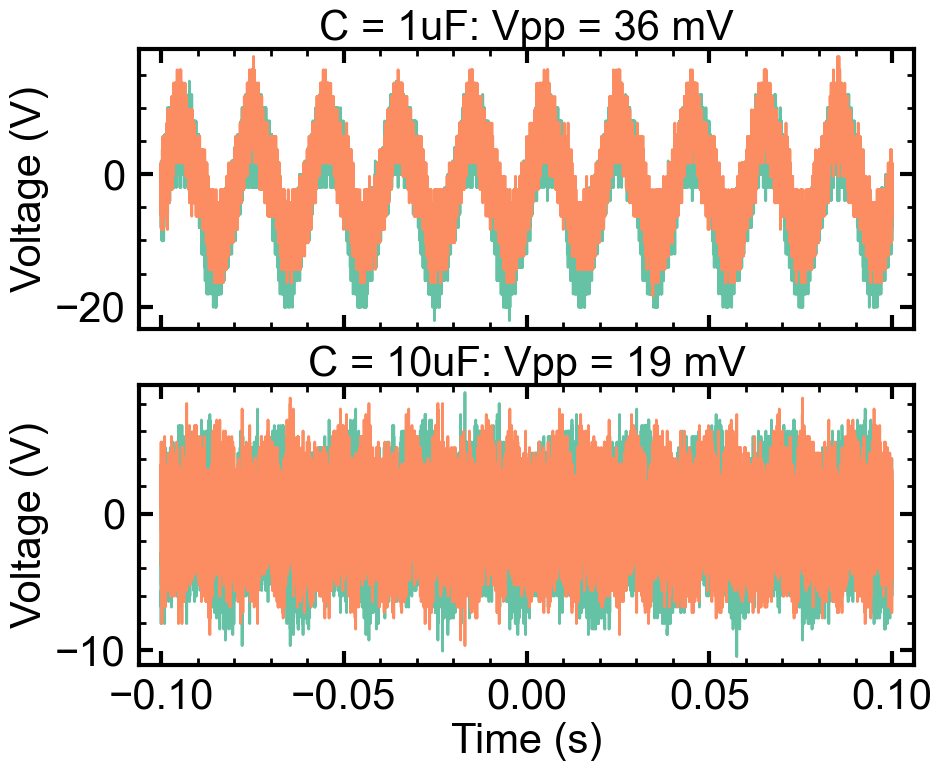

In [48]:
f = plt.figure()
ax = f.add_subplot(211)
# ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.plot(data[:,0],data[:,1]*1e3,color=colors[0],label='Vout+')
ax.plot(data[:,0],data[:,2]*1e3,color=colors[1],label='Vout-')
ax.set_xticklabels([])
ax1 = f.add_subplot(212)
ax1.plot(data1[:,0],data1[:,1]*1e3,color=colors[0],label='Vout+')
ax1.plot(data1[:,0],data1[:,2]*1e3,color=colors[1],label='Vout-')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')

# ax.plot(data[:,0],data[:,3]-np.min(data[:,3]),color=colors[2])
# ax.text(-0.1,43,'Vout+',color=colors[0])
# ax.text(-0.1,25,'Vout-',color=colors[1])
# ax.set_xlim(0.,0.2)
# ax.legend(loc='best')


# ax2 = plt.axes()
# # # # # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax, [0.5,0.12,0.4,0.4])
# ax2.set_axes_locator(ip)
# ax2.plot(data[:,0],data[:,2],color=colors[1])
# ax2.set_xlim(-0.2,0.)
# ax2.set_ylim(-0.165,-0.13)
# # # ax2.set_ylim(0,10)
# # # ax2.text(0.1,2,'Vin',color=colors[2])
# start = np.searchsorted(data[:,0],-0.165)
# end = np.searchsorted(data[:,0],-0.13)
signal = data[:,1]#[start:end]
vpp = max(signal) - min(signal)
ax.set_title('C = 1uF: Vpp = %.0f mV'%(1e3*vpp))

signal = data1[:,1]#[start:end]
vpp = max(signal) - min(signal)
ax1.set_title('C = 10uF: Vpp = %.0f mV'%(1e3*vpp))

# ax2.text(-0.2,-0.138,'Vpp = %.0f mV'%(1e3*vpp))
# mark_inset(ax, ax2, loc1=2, loc2=1, fc="none", ec="0.5")
# f.savefig(filename[:-4]+'_analysis.png',dpi=100,bbox_inches='tight',facecolor='white')
f.savefig(filename[:-4]+'_comparison.png',dpi=100,bbox_inches='tight',facecolor='white')